In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df1 = pd.read_csv("time_cleaned.csv")

#df1 = df1.set_index('time')
#df1.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
#df1

In [3]:
df1

,time,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10
0,26.05.2019 15:56:51,23,23,24,24,24,23,24,25,24,24
1,26.05.2019 16:26:57,23,23,24,24,24,24,24,25,24,24
2,26.05.2019 16:56:59,24,24,24,24,25,24,24,25,24,24
3,26.05.2019 17:07:00,25,24,24,25,25,24,24,25,25,25
4,26.05.2019 17:27:01,25,24,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...
7899,09.11.2019 6:38:25,21,20,20,20,21,20,20,21,20,20
7900,09.11.2019 7:08:30,21,20,20,20,21,20,20,21,20,20
7901,09.11.2019 7:28:36,21,20,20,20,21,20,20,21,20,20
7902,09.11.2019 8:48:56,21,20,20,20,21,20,20,21,20,20


In [4]:
def shaper(arr, n_time = 1):
    arr = arr.values.tolist()
    shape_list = []
    for i in range(0, len(arr) - n_time, 1):
        time_list = []
        for j in range(n_time):
            time_list +=arr[i + j]
        shape_list.append(time_list)
        
    columns = []
    for i in range((-n_time)+1,1,1):
        columns += ["Temp1_" + str(i), 
                    "Temp2_" + str(i), 
                    "Temp3_" + str(i), 
                    "Temp4_" + str(i), 
                    "Temp5_" + str(i), 
                    "Temp6_" + str(i), 
                    "Temp7_" + str(i), 
                    "Temp8_" + str(i), 
                    "Temp9_" + str(i), 
                    "Temp10_" + str(i),
                    #'cond1_off_' + str(i),
                    #'c1_16h_' + str(i), 
                    #'c1_16l_' + str(i), 
                    #'c1_23h_' + str(i), 
                    #'c1_23l_' + str(i), 
                    #'c1_30h_' + str(i), 
                    #'c1_30l_' + str(i), 
                    #'cond2_off_' + str(i), 
                    #'c2_16h_' + str(i), 
                    #'c2_16l_' + str(i), 
                    #'c2_23h_' + str(i), 
                    #'c2_23l_' + str(i), 
                    #'c2_30h_' + str(i), 
                    #'c2_30l_' + str(i)
                   ]
    
    td = pd.DataFrame(shape_list, columns = columns)
    return td

def union_shaper(df_list, n_time = 1):
    frames = []
    for i in range(len(df_list)):
        df = pd.DataFrame(df_list[i], columns = ["time", "Temp1","Temp2", "Temp3", "Temp4", "Temp5", "Temp6", "Temp7", "Temp8", "Temp9", "Temp10"])
        df = df.set_index('time')
        df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
        df = shaper(df, n_time)
        
        df['Temp1+1'] = df['Temp1_0'].shift(-1)
        df['Temp2+1'] = df['Temp2_0'].shift(-1)
        df['Temp3+1'] = df['Temp3_0'].shift(-1)
        df['Temp4+1'] = df['Temp4_0'].shift(-1)
        df['Temp5+1'] = df['Temp5_0'].shift(-1)
        df['Temp6+1'] = df['Temp6_0'].shift(-1)
        df['Temp7+1'] = df['Temp7_0'].shift(-1)
        df['Temp8+1'] = df['Temp8_0'].shift(-1)
        df['Temp9+1'] = df['Temp9_0'].shift(-1)
        df['Temp10+1'] = df['Temp10_0'].shift(-1)

        df['Temp1+1'].fillna(24, inplace=True)
        df['Temp2+1'].fillna(24, inplace=True)
        df['Temp3+1'].fillna(24, inplace=True)
        df['Temp4+1'].fillna(24, inplace=True)
        df['Temp5+1'].fillna(24, inplace=True)
        df['Temp6+1'].fillna(24, inplace=True)
        df['Temp7+1'].fillna(24, inplace=True)
        df['Temp8+1'].fillna(24, inplace=True)
        df['Temp9+1'].fillna(24, inplace=True)
        df['Temp10+1'].fillna(24, inplace=True)
        frames.append(df)
    return pd.concat(frames, ignore_index=True)

In [15]:
N_TIME = 4
df = union_shaper([df1], N_TIME)
df

,Temp1_-3,Temp2_-3,Temp3_-3,Temp4_-3,Temp5_-3,Temp6_-3,Temp7_-3,Temp8_-3,Temp9_-3,Temp10_-3,...,Temp1+1,Temp2+1,Temp3+1,Temp4+1,Temp5+1,Temp6+1,Temp7+1,Temp8+1,Temp9+1,Temp10+1
0,23,23,24,24,24,23,24,25,24,24,...,25.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
1,23,23,24,24,24,24,24,25,24,24,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
2,24,24,24,24,25,24,24,25,24,24,...,25.0,24.0,25.0,25.0,25.0,24.0,24.0,25.0,25.0,25.0
3,25,24,24,25,25,24,24,25,25,25,...,24.0,24.0,24.0,25.0,25.0,24.0,24.0,25.0,24.0,25.0
4,25,24,25,25,25,25,25,25,25,25,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,21,20,20,21,21,20,20,21,20,21,...,21.0,20.0,20.0,20.0,21.0,20.0,20.0,21.0,20.0,20.0
7896,21,20,20,21,21,20,20,21,20,20,...,21.0,20.0,20.0,20.0,21.0,20.0,20.0,21.0,20.0,20.0
7897,21,20,20,20,21,20,20,21,20,20,...,21.0,20.0,20.0,20.0,21.0,20.0,20.0,21.0,20.0,20.0
7898,21,20,20,20,21,20,20,21,20,20,...,21.0,20.0,20.0,20.0,21.0,20.0,20.0,21.0,20.0,20.0


In [16]:
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]

y=np.reshape(y.values, (-1,10))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [17]:
X_train = scaler_x.transform(x)
y_train = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [29]:
model = Sequential()
model.add(Dense(128, input_dim=10 * N_TIME, kernel_initializer='uniform', activation='relu'))
model.add(Dense(256))
model.add(Dense(10, activation='softmax'))
model.summary()
# Use a custom metricfunction

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

fit = model.fit(X_train, y_train, epochs=100,  verbose=1, validation_split=0.5)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 40,842
Trainable params: 40,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 0s 2ms/step - loss: 52.6951 - accuracy: 0.3301 - val_loss: 158.4747 - val_accuracy: 0.4117
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 184.5490 - accuracy: 0.2769 - val_loss: 144.4887 - val_accuracy: 0.0111
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 232.1500 - accurac

Epoch 51/100
99/99 [==============================] - 0s 2ms/step - loss: 39749.2148 - accuracy: 0.1152 - val_loss: 27162.1523 - val_accuracy: 3.1646e-04
Epoch 52/100
99/99 [==============================] - 0s 2ms/step - loss: 47671.6602 - accuracy: 0.1161 - val_loss: 53316.9336 - val_accuracy: 0.4117
Epoch 53/100
99/99 [==============================] - 0s 2ms/step - loss: 49913.8516 - accuracy: 0.1193 - val_loss: 44113.1250 - val_accuracy: 0.0070
Epoch 54/100
99/99 [==============================] - 0s 2ms/step - loss: 46804.8008 - accuracy: 0.1155 - val_loss: 61370.4570 - val_accuracy: 0.0070
Epoch 55/100
99/99 [==============================] - 0s 2ms/step - loss: 41234.2852 - accuracy: 0.1190 - val_loss: 38344.1016 - val_accuracy: 0.0218
Epoch 56/100
99/99 [==============================] - 0s 2ms/step - loss: 42784.5664 - accuracy: 0.1282 - val_loss: 50512.0352 - val_accuracy: 0.1294
Epoch 57/100
99/99 [==============================] - 0s 2ms/step - loss: 49714.0820 - accuracy:

In [30]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

50/50 [==============================] - 0s 839us/step - loss: 84745.9062 - accuracy: 0.4108
Доля верных ответов на тестовых данных, в процентах: 41.0759


In [31]:
def pred_plot(x, y, p, index):
    mpl.rcParams['figure.figsize'] = (4, 3)
    mpl.rcParams['axes.grid'] = False
    
    history = np.transpose(np.reshape(x[index], (-1, 10)))
    
    length = history.shape[1]
    #np.reshape(X, (-1, 10))[-1].tolist()
    
    real = np.transpose(np.array(y[index]))
    
    pred = np.transpose(np.array(p[index]))
    
    for i in range(10):
        percent = (history[i].max() - history[i].min())
        result = (percent-abs(real[i] - pred[i]))/percent
        
        plt.plot(range(length), history[i], label='History')
        plt.plot(length, real[i], 'bo', label='Real')
        plt.plot(length, pred[i], 'rx', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Temperature value')
        plt.legend(loc='upper left')
        plt.title('index: ' + str(index) + ', temp: ' + str(i+1) + '\npercent: ' + str(result*100))
        plt.show()  

In [32]:
scaler_x.inverse_transform(X_test[:2])

array([[26., 26., 26., 26., 27., 26., 26., 27., 26., 26., 27., 26., 26.,
        26., 27., 26., 26., 27., 27., 27., 27., 26., 26., 26., 27., 26.,
        26., 27., 27., 27., 26., 26., 26., 26., 27., 26., 26., 27., 27.,
        27.],
       [27., 27., 27., 27., 27., 27., 27., 28., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 28., 27., 27., 27., 27., 27., 27., 27., 26.,
        27., 27., 27., 27., 27., 26., 27., 27., 27., 26., 27., 27., 27.,
        27.]])

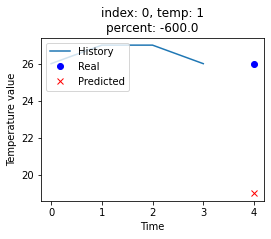

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


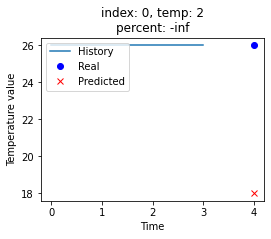

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


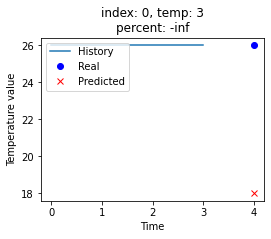

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


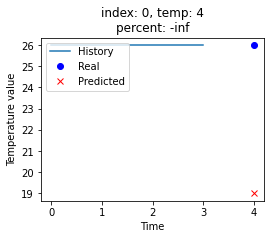

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


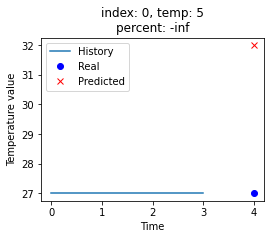

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


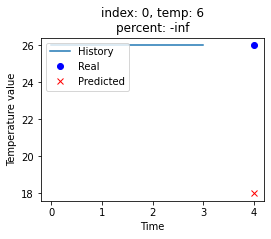

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


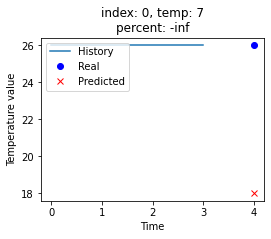

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


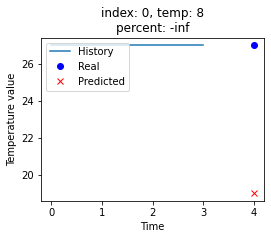

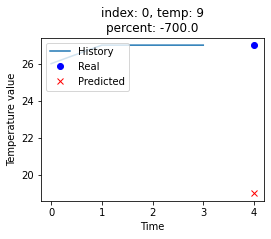

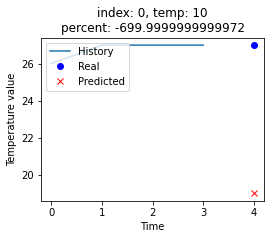

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


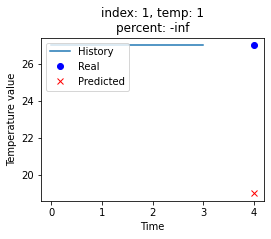

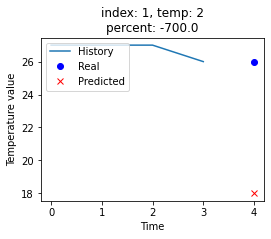

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


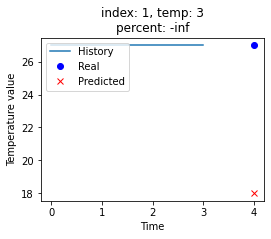

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


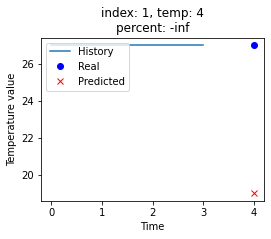

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


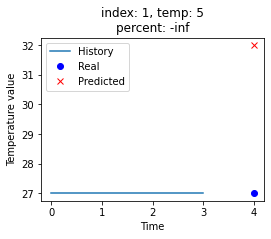

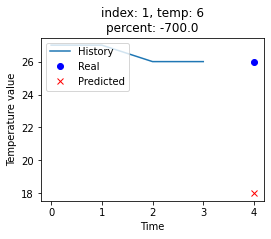

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


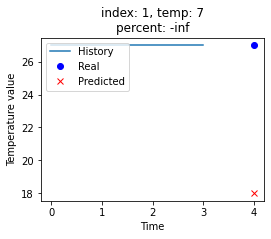

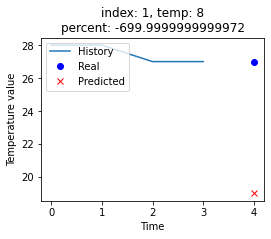

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


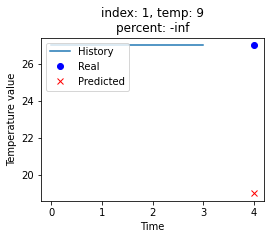

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


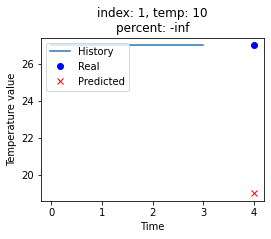

In [33]:
for i in range(2):
    pred_plot(scaler_x.inverse_transform(X_test[:i+1]),
              scaler_y.inverse_transform(y_test[:i+1]),
              scaler_y.inverse_transform(model.predict(X_test[:i+1])),
              i)

# Testing and Experiments

In [34]:
for i in range(5):
    print('test index:', i)
    true = scaler_x.inverse_transform(X_test[i:i+1])[0][(N_TIME - 1) * 10:(N_TIME - 1) * 10 + 10]
    print('True: ', true)

    ynew= model.predict(X_test)
    predict = scaler_y.inverse_transform(ynew[i:i+1])[0]
    print('Predicted: ', predict)

    result = []
    for j in range(len(true)):
        result.append([true[j], " - ", predict[j], " = ", abs(true[j] - predict[j])])
    
    for j in result:
        print(j)
    print("\n")

test index: 0
True:  [26. 26. 26. 26. 27. 26. 26. 27. 27. 27.]
Predicted:  [19. 18. 18. 19. 32. 18. 18. 19. 19. 19.]
[26.0, ' - ', 19.0, ' = ', 7.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[26.0, ' - ', 19.0, ' = ', 7.0]
[27.0, ' - ', 32.0, ' = ', 5.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[27.0, ' - ', 19.0, ' = ', 8.0]
[27.0, ' - ', 19.0, ' = ', 8.0]
[27.0, ' - ', 19.0, ' = ', 8.0]


test index: 1
True:  [27. 26. 27. 27. 27. 26. 27. 27. 27. 27.]
Predicted:  [19. 18. 18. 19. 32. 18. 18. 19. 19. 19.]
[27.0, ' - ', 19.0, ' = ', 8.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[27.0, ' - ', 18.0, ' = ', 9.0]
[27.0, ' - ', 19.0, ' = ', 8.0]
[27.0, ' - ', 32.0, ' = ', 5.0]
[26.0, ' - ', 18.0, ' = ', 8.0]
[27.0, ' - ', 18.0, ' = ', 9.0]
[27.0, ' - ', 19.0, ' = ', 8.0]
[27.0, ' - ', 19.0, ' = ', 8.0]
[27.0, ' - ', 19.0, ' = ', 8.0]


test index: 2
True:  [27. 27. 27. 26. 27. 26. 26. 28. 27. 27.]
Predicted:  [19. 18. 18. 19. 32. 18. 18. 19. 19. 19.]
[27.0

# Visualizations

In [35]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

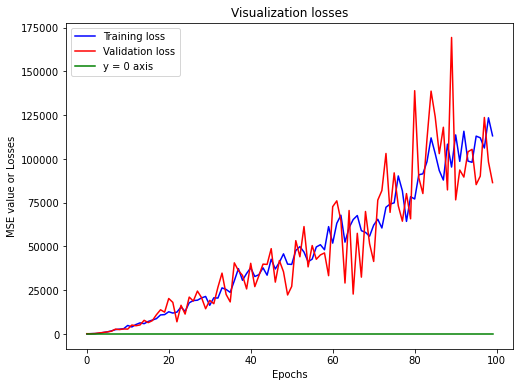

In [36]:
plot_train_history(fit,
                   'Visualization losses')